In [2]:
import sklearn #
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import torch 
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
import os 
from tqdm import tqdm

In [3]:
directory = r"C:\Users\david\OneDrive\Documents\ml data assine" #directory path where the files are stored
prossesed_CSVs = [] #list to store the processed files

#########################################################################################################

Data_unpro_uniformed_files = ["CanopInt_inst_data.csv", #list of files to be processed and cleaned
                    "ESoil_tavg_data.csv",
                    "Rainf_tavg_data.csv",
                    "Snowf_tavg_data.csv",
                    "SoilMoi0_10cm_inst_data.csv",
                    "SoilMoi10_40cm_inst_data.csv",
                    "SoilMoi40_100cm_inst_data.csv",
                    "SoilMoi100_200cm_inst_data.csv",
                    "SoilTMP0_10cm_inst_data.csv",
                    "SoilTMP10_40cm_inst_data.csv",
                    "SoilTMP40_100cm_inst_data.csv",
                    "SoilTMP100_200cm_inst_data.csv",
                    "TVeg_tavg_data.csv",
                    "TWS_inst_data.csv"]

def file_prep_uniformed(path): #function to process the files
    file = pd.read_csv(path)

    for col in file.columns[2:14]: #  skips the first two columns and processes the rest
        repeated_val = (file[col].shift(1) == file[col]) & (file[col] != 0) #checks for repeated values
        is_whole = (file[col] % 1 == 0) & (file[col] != 0)# checks for whole numbers
        file.loc[repeated_val, col] = np.nan #sets the repeated values to NaN
        file.loc[is_whole, col] = np.nan #sets the whole numbers to NaN

    grouped = file.groupby(['latitude', 'longitude']) # file gouping by latitude and longitude

    for col in file.columns[2:14]:
        vals_valid = file[col].where(file[col] != 0)
        file[col] = file[col].clip( lower=grouped[vals_valid.name].transform('mean') # sets the limit to the mean of the group
                                    - 3 * grouped[vals_valid.name].transform('std'), #
                                    upper=grouped[vals_valid.name].transform('mean') 
                                    + 3 * grouped[vals_valid.name].transform('std'))

    
    for col in file.columns[2:14]:
        file[col] = file[col].interpolate(method='linear', limit_direction='both', axis=0) #interpolates the values in the columns
        
        file[col] = file[col].ffill().bfill()

    
    file = file.dropna(subset=['latitude', 'longitude']) #drops any NaN values in the latitude and longitude columns

    if file.empty:
        raise ValueError(f"File {path} became empty after cleaning!")

    file = file.sort_values(by=['latitude', 'longitude'])
    return file

for f in Data_unpro_uniformed_files: ##loops through the files in the directory
    path = f"{directory}\\{f}"
    if not os.path.exists(path): #checks if the file exists in the directory
        print(f"no file: {path}") #prints the path of the file if it does not exist
        continue
    try: 
        prosses_csv = file_prep_uniformed(path)##calls the function to process the file
        print(f"{f} compleat - rows = {len(prosses_csv)}")
        new_excel_file = f"C:\\Users\\david\\OneDrive\\Documents\\ml data assine\\Cleaned\\cleaned_{f}"#saves the cleaned file to a new file
        prosses_csv.to_csv(new_excel_file, index=False) #saves the cleaned file to a new file
    except Exception as ex: #catches any errors that occur during the processing of the file
        print(f"uniformed error {ex}")

########################################################################################################

#########################################################################################################

Data_unpro_nonunif_files = ["Land_cover_percent_data.csv",
                            "Yield_and_Production_data.csv"]
def file_prep_nonunif(path):
    file = pd.read_csv(path) #reads excel file and stors it in a variable
    duplicated_data = file[file.duplicated()]
    file = file.drop_duplicates() #drops any duplicate values
    file = file.dropna()#drops any NaN values
    #file = file.sort_values(by=['latitude', 'longitude'])
    return file

for fi in Data_unpro_nonunif_files:  #loops through the files in the directory
    path = f"{directory}\\{fi}"
    try:
        prosses_csv = file_prep_nonunif(path) #calls the function to process the file
        print(f"{fi} compleat - rows = {len(prosses_csv)}")
        new_excel_file = f"C:\\Users\\david\\OneDrive\\Documents\\ml data assine\\Cleaned\\cleaned_{fi}"
        prosses_csv.to_csv(new_excel_file, index=False) #saves the cleaned file to a new file
    except Exception as ex: #
        print(f"ununiformed error {ex}")   

CanopInt_inst_data.csv compleat - rows = 194298
ESoil_tavg_data.csv compleat - rows = 194298
Rainf_tavg_data.csv compleat - rows = 194298
Snowf_tavg_data.csv compleat - rows = 194298
SoilMoi0_10cm_inst_data.csv compleat - rows = 194298
SoilMoi10_40cm_inst_data.csv compleat - rows = 194298
SoilMoi40_100cm_inst_data.csv compleat - rows = 194298
SoilMoi100_200cm_inst_data.csv compleat - rows = 194298
SoilTMP0_10cm_inst_data.csv compleat - rows = 194298
SoilTMP10_40cm_inst_data.csv compleat - rows = 194298
SoilTMP40_100cm_inst_data.csv compleat - rows = 194298
SoilTMP100_200cm_inst_data.csv compleat - rows = 194298
TVeg_tavg_data.csv compleat - rows = 194298
TWS_inst_data.csv compleat - rows = 194298
Land_cover_percent_data.csv compleat - rows = 644280
Yield_and_Production_data.csv compleat - rows = 158269


In [4]:
##########################################################################################################

def file_prep_countrys(path):
    file = pd.read_csv(path) #reads excel file and stors it in a variable
    duplicated_data = file[file.duplicated()]
    file = file.drop_duplicates() #drops any duplicate values
    file = file.dropna()#drops any NaN values
    file = file[(file!=0).all(axis=1)] #drops any zero values
    return file

path = f"{directory}\\country_latitude_longitude_area_lookup.csv" 
try:
    prosses_csv = file_prep_countrys(path) #calls the function to process the file
    prossesed_CSVs.append(prosses_csv)  
    print(f"country_latitude_longitude_area_lookup compleat - rows = {len(prosses_csv)}")
    new_excel_file = f"C:\\Users\\david\\OneDrive\\Documents\\ml data assine\\Cleaned\\cleaned_country_latitude_longitude_area_lookup.csv"
    prosses_csv.to_csv(new_excel_file, index=False) #saves the cleaned file to a new file
except Exception as ex:
    print(f"country error {ex}")  

############################################################################################################################

country_latitude_longitude_area_lookup compleat - rows = 238


In [5]:
############################################################################################################################
    
cleaned_files = ["cleaned_CanopInt_inst_data.csv", #list of cleaned files to be merged
                "cleaned_ESoil_tavg_data.csv",
                "cleaned_Rainf_tavg_data.csv",
                "cleaned_Snowf_tavg_data.csv",
                "cleaned_SoilMoi0_10cm_inst_data.csv",
                "cleaned_SoilMoi10_40cm_inst_data.csv",
                "cleaned_SoilMoi40_100cm_inst_data.csv",
                "cleaned_SoilMoi100_200cm_inst_data.csv",
                "cleaned_SoilTMP0_10cm_inst_data.csv",
                "cleaned_SoilTMP10_40cm_inst_data.csv",
                "cleaned_SoilTMP40_100cm_inst_data.csv",
                "cleaned_SoilTMP100_200cm_inst_data.csv",
                "cleaned_TVeg_tavg_data.csv",
                "cleaned_TWS_inst_data.csv"]

clean_directory = r"C:\Users\david\OneDrive\Documents\ml data assine\Cleaned" # crreate a directory for the cleaned files.
master_frame = None #initializes the master frame to None
for f in tqdm(cleaned_files, desc="Merging CSVs"):#loops through the cleaned files and merges them into one file.
    path = os.path.join(clean_directory, f)
    df = pd.read_csv(path)
    if master_frame is None:
        master_frame = df
    else:
        master_frame = master_frame.merge(df, on=["longitude", "latitude", "year"], how="left") #merges the files on the longitude, latitude and year columns
        
    

############################################################################################################################

Merging CSVs: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]


In [6]:
############################################################################################################################

def r_to_z(numorator, denomenator): #function calculate the ratio between the two fetures
    ratio = numorator / denomenator
    ratio[(numorator == 0) | (denomenator == 0)] = 0 #sets the ratio to 0 if the numorator or denomenator is 0
    return ratio
def feature_agrrigation(master_frame):  #function creates new features based on existing ones
    month = 1 
    new_master_frame = {} #initializes a new master frame and store new features
    while month <= 12: #loops through the months
        new_master_frame[f'rainfall_to_evaporation_ratio_month_{month}'] = r_to_z(master_frame[f'Rainf_tavg_month_{month}'], (master_frame[f'CanopInt_inst_month_{month}'])) #calculates the ratio of rainfall to evaporation
        new_master_frame[f'rainfall_to_tws_ratio_month_{month}'] = r_to_z(master_frame[f'Rainf_tavg_month_{month}'], (master_frame[f'TWS_inst_month_{month}'])) #calculates the ratio of rainfall to TWS
        new_master_frame[f'evap_temp_ratio_0_10_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilTMP0_10cm_inst_month_{month}']))   #calculates the ratio of evaporation to temperature for the 0-10cm soil layer
        new_master_frame[f'evap_temp_ratio_10_40_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilTMP10_40cm_inst_month_{month}'])) #calculates the ratio of evaporation to temperature for the 10-40cm soil layer
        new_master_frame[f'evap_temp_ratio_40_100_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilTMP40_100cm_inst_month_{month}'])) #calculates the ratio of evaporation to temperature for the 40-100cm soil layer
        new_master_frame[f'evap_temp_ratio_100_200_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilTMP100_200cm_inst_month_{month}'])) #calculates the ratio of evaporation to temperature for the 100-200cm soil layer
        new_master_frame[f'evap_soil_moisture_ratio_0_10_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilMoi0_10cm_inst_month_{month}'])) #calculates the ratio of evaporation to soil moisture for the 0-10cm soil layer
        new_master_frame[f'evap_soil_moisture_ratio_10_40_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilMoi10_40cm_inst_month_{month}'])) #calculates the ratio of evaporation to soil moisture for the 10-40cm soil layer
        new_master_frame[f'evap_soil_moisture_ratio_40_100_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilMoi40_100cm_inst_month_{month}']))  #calculates the ratio of evaporation to soil moisture for the 40-100cm soil layer
        new_master_frame[f'evap_soil_moisture_ratio_100_200_month_{month}'] = r_to_z(master_frame[f'ESoil_tavg_month_{month}'] , (master_frame[f'SoilMoi100_200cm_inst_month_{month}'])) #calculates the ratio of evaporation to soil moisture for the 100-200cm soil layer
        print(f"features compleat for month - {month}")
        month += 1
    new_data_frame = pd.DataFrame(new_master_frame) #creates a new data frame from the new master frame
    master_frame = pd.concat([master_frame.reset_index(drop=True), new_data_frame.reset_index(drop=True)], axis=1) #concatenates the new data frame with the master frame
    
    return master_frame  
master_frame = feature_agrrigation(master_frame) #calls the function to create new features based on existing ones       

features compleat for month - 1
features compleat for month - 2
features compleat for month - 3
features compleat for month - 4
features compleat for month - 5
features compleat for month - 6
features compleat for month - 7
features compleat for month - 8
features compleat for month - 9
features compleat for month - 10
features compleat for month - 11
features compleat for month - 12


In [7]:



############################################################################################################################

In [8]:
############################################################################################################################
land_cover= pd.read_csv(os.path.join(clean_directory, "cleaned_Land_cover_percent_data.csv")) 
land_cover.iloc[:, 3:21] = land_cover.iloc[:, 3:21] / 100.0 # Normalize land cover percentages to be between 0 and 1
master_frame = master_frame.merge(land_cover, on=['latitude', 'longitude', 'year'], how="left") 

features = master_frame.drop(columns=['latitude', 'longitude', 'year']) # Remove non-feature columns
zeros = (features == 0) # Create a mask for zero values
feature_scale = MinMaxScaler().fit_transform(features.mask(zeros)) # Scale features using MinMaxScaler
#feature_scale = StandardScaler().fit_transform(features.mask(zeros)) # Scale features using StandardScaler   
feature_scale = pd.DataFrame(feature_scale, columns=features.columns) # Create a DataFrame from the scaled features
feature_scale[zeros] = 0 # Set the zero values back to zero in the scaled DataFrame
master_frame  = pd.concat([master_frame[['latitude', 'longitude', 'year']], feature_scale], axis=1) 

MF = master_frame.drop(columns=['latitude', 'longitude', 'year'])  # Remove non-feature columns
pca = PCA(n_components=0.95) # Initialize PCA to preserve 95% of the variance.
X_pca = pca.fit_transform(MF) # Apply PCA to the features
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # Calculate cumulative variance explained by the components

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]) # Create a DataFrame for PCA components
pca_df[['latitude', 'longitude', 'year']] = master_frame[['latitude', 'longitude', 'year']].reset_index(drop=True) # Add latitude, longitude, and year back to the PCA DataFrame
master_frame = pca_df



############################################################################################################################

In [9]:
############################################################################################################################   

def Havasine_distance(lat1, lon1, lat2, lon2): #function to calculate the distance between two points on the earth using the Haversine formula metric
    Earth_radius = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1) # Difference in latitude
    dlon = np.radians(lon2 - lon1) # Difference in longitude
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2 # Haversine formula
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)) # Calculate the angular distance in radians
    distance = Earth_radius * c # Distance in kilometers
    return distance  

clean_lookup = pd.read_csv(os.path.join(clean_directory, "cleaned_country_latitude_longitude_area_lookup.csv")) 

def country_assignment(master_frame, country_lookup): #function to assign countries to the data points based on their latitude and longitude
    assigned_rows = []  

    for index, row in tqdm(master_frame.iterrows(), total=master_frame.shape[0], desc="Assigning countries"): # Iterate through each row in the master frame
        lat, lon, year = row['latitude'], row['longitude'], row['year']

        distances = country_lookup.apply(lambda x: Havasine_distance(lat, lon, x['centroid latitude'], x['centroid longitude']),axis=1) # Calculate distances to all countries

        inside_radius = distances <= country_lookup['centroid radius'] # Check if the point is within the radius of any country

        if inside_radius.any(): # If the point is inside the radius of any country
            candidate_countries = country_lookup[inside_radius] # Get the candidate countries
            closest_idx = distances[inside_radius].idxmin() # Get the index of the closest country within the radius
        else:
            # Fallback to absolutely closest country
            closest_idx = distances.idxmin()
        
        
        closest_country = country_lookup.loc[closest_idx, 'country'] # Get the closest country name
        assigned_rows.append({'latitude': lat, 'longitude': lon, 'year': year, 'country': closest_country}) # Append the assigned country to the list

    # Convert result to a DataFrame and merge once at the end
    result_df = pd.DataFrame(assigned_rows) # Create a DataFrame from the assigned rows
    master_frame = master_frame.merge(result_df, on=['latitude', 'longitude', 'year'], how='left') # Merge the assigned countries with the master frame

    return master_frame  

master_frame = country_assignment(master_frame, clean_lookup) #calls the function to assign countries to the data points based on their latitude and longitude


Assigning countries: 100%|██████████| 194298/194298 [14:34<00:00, 222.20it/s]


In [10]:
drop = ['country', 'year'] 
include = [col for col in master_frame.columns if col not in drop] # list of columns to include in the master frame
master_group = master_frame.groupby(['country', 'year'])[include] # Group by country and year

master_means = master_group.mean().reset_index() # Calculate the mean for each country and year
master_frame = master_means

master_frame.to_csv(r"C:\Users\david\OneDrive\Documents\ml data assine\Cleaned\Master_file.csv", index=False) #
print(f"Master file created with shape {master_frame.shape}")     
 

Master file created with shape (2509, 25)


In [11]:
yeald_lables = (pd.read_csv(r"C:\Users\david\OneDrive\Documents\ml data assine\Cleaned\cleaned_Yield_and_Production_data.csv"))

lables_transpose = yeald_lables.pivot_table(index=['Country', 'Year'], #pivots the table to get the labels in the correct format 
                                            columns=['Element', 'Item'],
                                            values='Value',
                                            aggfunc='first')

lables_transpose.columns = [f"Y_{e}_{i}" if isinstance(e, str) else e for e, i in lables_transpose.columns] #adds the Y_ to the labels for identification of output lables
lables_transpose = lables_transpose.reset_index()

lables_transpose['Year'] = lables_transpose['Year'] - 1 #shifts the year back by one to match the master frame(crutial step when predicting fute year, as the model will be trained on the previous year data)
# 
master_frame = master_frame.merge(lables_transpose, left_on=['country', 'year'], right_on=['Country', 'Year'], how='left') #merges the labels with the master frame
master_frame = master_frame.drop(columns=['Country', 'Year'])
master_frame = master_frame.drop(columns=[col for col in master_frame.columns if "Y_Production" in col])

#master_frame = master_frame.replace(np.nan, 0)

master_frame.to_csv(r"C:\Users\david\OneDrive\Documents\ml data assine\Cleaned\Master_file.csv", index=False)
print(f"Master file created with shape {master_frame.shape}") 

Master file created with shape (2509, 127)


In [ ]:
Lable_cols = [col for col in master_frame.columns if col.startswith('Y_')] # labels, this is the list of labels that are used to train the model
out_Ds = len(Lable_cols) # number of labels

Dimention_cols = [col for col in master_frame.columns if col.startswith('PC') or col.startswith('Land') ] # features, this is the list of features that are used to train the model
in_Ds = len(Dimention_cols) # number of features

print(f"input Dimention = {in_Ds} output Dimention = {out_Ds}") # number of features and labels
x_cols = Dimention_cols
y_cols = Lable_cols  

train_frame, temp_frame = train_test_split(master_frame, test_size=0.3, random_state=42) # First split: train(70%)/temp (30%)
val_frame, test_frame = train_test_split(temp_frame, test_size=0.5, random_state=42) # Second split: temp split into validation(15%)/test (15%)

class YieldDataset(Dataset): # Custom dataset class
    def __init__(self, df, x_cols, y_cols): # Initialize the dataset
        self.X = torch.tensor(df[x_cols].values, dtype=torch.float32) # Features
        
        y_vals = df[y_cols].values
        self.Y = torch.tensor(np.nan_to_num(y_vals, nan=0.0), dtype=torch.float32)  # Replace NaN with 0s
        self.mask = torch.tensor(~np.isnan(y_vals), dtype=torch.float32) # Mask for valid labels

    def __len__(self): # Return the number of samples in the dataset
        return len(self.X)

    def __getitem__(self, idx): # Get a sample from the dataset
        return self.X[idx], self.Y[idx], self.mask[idx]
    
train_dataset = YieldDataset(train_frame, x_cols, y_cols) ## Training dataset
val_dataset = YieldDataset(val_frame, x_cols, y_cols)## Validation dataset
test_dataset = YieldDataset(test_frame, x_cols, y_cols) ## Test dataset

train_loader = DataLoader(train_dataset, batch_size=64) ## DataLoader for training data that shuffles the data and loads it in batches of 64 to the model
val_loader = DataLoader(val_dataset, batch_size=64) ## DataLoader for validation data that loads it in batches of 64 to the model and does not shuffle the data
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset)) ## DataLoader for test data that loads it in batches of the entire dataset to the model

def masked_mse_loss(pred, true, mask): # Custom loss function that computes the mean squared error only for valid labels
    loss = (pred - true) ** 2
    return (loss * mask).sum() / mask.sum()
def masked_l1_loss(pred, true, mask):
    loss = torch.abs(pred - true)
    return (loss * mask).sum() / mask.sum()
loss_fn = nn.MSELoss() # Loss function, this is the function that is used to compute the loss between the predicted output and the actual output



batch_size = 50 # batch size that is used in the model and is passed to the model
learning_rate = 0.505 # learning rate that is used in the model and is passed to the model
epochs = 1000 # number of epochs that the model is trained for and is passed to the model
dropout_rate = 0.1 # dropout rate that is used in the model and is passed to the model

train_losses = [] # List to store training losses
val_losses = [] # List to store validation losses
   
best_val_loss = float('inf') # Initialize best validation loss to infinity so that any loss is better than it
early_stop_latency = 20 # Number of epochs to wait before stopping the training if no improvement is seen
early_stop_counter = 0 # Counter for early stopping

class TS_ForCa_MV_MLP(nn.Module): # Define the model class that inherits from nn.Module which 
    def __init__(self, input_size, output_size, dropout_prob=0.05): # Initialize the model with input size, hidden layer sizes, output size and dropout probability
        super(TS_ForCa_MV_MLP, self).__init__()

        self.model = nn.Sequential( # Define the model architecture using nn.Sequential which allowed me to stack layers in a sequential manner
            nn.Linear(in_Ds, 256), # Input layer and hidden layer 1
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(dropout_rate),
            
            nn.Linear(256, 128), # Hidden layer 2
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(dropout_rate),
            
            nn.Linear(128, 102), # Hidden layer 3
            nn.ReLU(),
            nn.BatchNorm1d(102),
            nn.Dropout(dropout_rate),

            nn.Linear(102, out_Ds), # Output layer
            #nn.ReLU()
        )

    def forward(self, ins): # Forward pass through the model, this method is called when the model is called with input data it work to compute the output of the model
        return self.model(ins)

model = TS_ForCa_MV_MLP(in_Ds, out_Ds, dropout_rate) # Create the model with input size, hidden layer sizes, output size and dropout probability
model = model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")) # Move the model to GPU if available

def regression_metrics(y_true, y_pred, mask): # Function to calculate regression metrics, this function is used to compute the mean absolute error and root mean squared error between the predicted output and the actual output, it takes in the true output, predicted output and the mask as input
    mae = torch.sum(torch.abs(y_true - y_pred) * mask) / mask.sum()
    mse = torch.sum((y_true - y_pred) ** 2 * mask) / mask.sum()
    rmse = torch.sqrt(mse)
    return mae.item(), rmse.item()

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)  # L2 regularization, this is the optimizer that is used to update the model parameter
#optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # SGD is a stochastic gradient descent optimizer that is used to update the model parameters
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)




input Dimention = 21 output Dimention = 102


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

best_val_loss = float('inf')
early_stop_counter = 0
best_epoch = 0

train_losses = []
val_losses_history = []
mae_history = []
rmse_history = []

for epoch in tqdm(range(epochs)):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch, mask in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        mask = mask.to(device)

        # Build mask to ignore zero and missing labels
        nonzero_mask = (y_batch != 0).float()
        final_mask = mask * nonzero_mask

        optimizer.zero_grad()
        preds = model(X_batch)

        # Masked MSE loss to ignore NaNs and 0s
        loss = masked_mse_loss(preds, y_batch, final_mask)
        #loss = masked_l1_loss(preds, y_batch, final_mask)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Validation loop
    model.eval()
    val_losses, maes, rmses = [], [], []

    with torch.no_grad():
        for X_val_batch, y_val_batch, mask in val_loader:
            X_val_batch = X_val_batch.to(device)
            y_val_batch = y_val_batch.to(device)
            mask = mask.to(device)

            nonzero_mask = (y_val_batch != 0).float()
            final_mask = mask * nonzero_mask

            val_preds = model(X_val_batch)
            val_loss = masked_mse_loss(val_preds, y_val_batch, final_mask).item()
            mae, rmse = regression_metrics(y_val_batch, val_preds, final_mask)

            val_losses.append(val_loss)
            maes.append(mae)
            rmses.append(rmse)

    avg_val_loss = np.mean(val_losses)
    avg_mae = np.mean(maes)
    avg_rmse = np.mean(rmses)

    val_losses_history.append(avg_val_loss)
    mae_history.append(avg_mae)
    rmse_history.append(avg_rmse)

    scheduler.step(avg_val_loss)
    current_lr = optimizer.param_groups[0]['lr']
    

    # Early stopping based on validation loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        best_model_state = model.state_dict()
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stop_latency:
            print("⏹️ Early stopping triggered")
            break
print(f"Epoch {epoch+1}: LR={current_lr:.6f}, Train Loss={avg_loss:.4f}, Val Loss={avg_val_loss:.4f}, MAE={avg_mae:.2f}, RMSE={avg_rmse:.2f}")
print(f"Best model from epoch {best_epoch} with Val Loss={best_val_loss:.4f}")
model.load_state_dict(best_model_state)
model.eval()

# Final test set evaluation
if not any(True for _ in test_loader):
    raise ValueError("Test loader is empty!")

with torch.no_grad():
    for X_test_batch, y_test_batch, mask in test_loader:
        X_test_batch = X_test_batch.to(device)
        y_test_batch = y_test_batch.to(device)
        mask = mask.to(device)
        preds = model(X_test_batch)
        break  # Only one batch in test set

# Save predictions with masking
preds_np = preds.cpu().numpy()
labels_np = y_test_batch.cpu().numpy()
mask_np = mask.cpu().numpy()

#preds_np = label_scaler.inverse_transform(np.nan_to_num(preds_np, nan=0.0))
#labels_np = label_scaler.inverse_transform(np.nan_to_num(labels_np, nan=0.0))

# Mask invalid values
preds_np = np.where(mask_np == 0, np.nan, preds_np) ################################################
labels_np = np.where(mask_np == 0, np.nan, labels_np) ################################################
labels_masked = np.where(mask_np == 1, labels_np, np.nan)
preds_masked = np.where(mask_np == 1, preds_np, np.nan)

# Optional: Re-mask any invalid values as NaN again (so R² doesn't mislead)
preds_np = np.where(mask_np == 0, np.nan, preds_np)
labels_np = np.where(mask_np == 0, np.nan, labels_np)

valid_mask = (mask_np == 1)

r2_scores = []
for i in range(preds_np.shape[1]):
    true_vals = labels_np[:, i][valid_mask[:, i]]
    pred_vals = preds_np[:, i][valid_mask[:, i]]

    if len(true_vals) > 1:  # Need at least 2 points
        r2 = r2_score(true_vals, pred_vals)
        r2_scores.append(r2)
    else:
        r2_scores.append(np.nan)

mean_r2 = np.nanmean(r2_scores)

print("\n📊 R² scores per label:")
for col, r2 in zip(y_cols, r2_scores):
    print(f"{col}: R² = {r2:.3f}")

# Compute test MAE and RMSE
test_mae = np.nanmean(np.abs(preds_masked - labels_masked))
test_rmse = np.sqrt(np.nanmean((preds_masked - labels_masked) ** 2))
print(f"\n✅ Test MAE = {test_mae:.2f}, RMSE = {test_rmse:.2f}\n, Mean R² across all targets: {mean_r2:.3f}")

# Save interleaved predictions
meta_test = test_frame[["country", "year"]].reset_index(drop=True)
pred_df = pd.DataFrame(preds_np, columns=[f"Pred_{col}" for col in y_cols])
true_df = pd.DataFrame(labels_np, columns=[f"True_{col}" for col in y_cols])

combined_cols = []
for col in y_cols:
    combined_cols.append(true_df[f"True_{col}"])
    combined_cols.append(pred_df[f"Pred_{col}"])

interleaved_df = pd.concat(combined_cols, axis=1)
interleaved_df.columns = [col.replace("True_", "") + "_True" if i % 2 == 0 else col.replace("Pred_", "") + "_Pred"for i, col in enumerate(interleaved_df.columns)]

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #check if GPU is available and set device accordingly
model = model.to(device) #move model to GPU if available

best_val_loss = float('inf') #initialize best validation loss to infinity so that any loss is better than it
early_stop_counter = 0 #counter for early stopping
best_epoch = 0  #initialize best epoch to 0

train_losses = [] #list to store training losses
val_losses_history = [] #list to store validation losses
mae_history = [] #list to store mean absolute errors
rmse_history = [] #list to store root mean squared errors

for epoch in tqdm(range(epochs)): # loop through epochs
    model.train()
    epoch_loss = 0

    for X_batch, y_batch, mask in train_loader: #loop through batches in training data
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        mask = mask.to(device)

        nonzero_mask = (y_batch != 0).float() #create a mask for non-zero values in the labels
        final_mask = mask * nonzero_mask

        optimizer.zero_grad() #zero the gradients before backward pass
        preds = model(X_batch) #forward pass through the model

        # Masked MSE loss to ignore NaNs and 0s
        loss = masked_mse_loss(preds, y_batch, final_mask) #compute loss using masked MSE loss function
        #loss = masked_l1_loss(preds, y_batch, final_mask) # ompute L1 loss instead of MSE loss

        loss.backward() #backward pass to compute gradients
        
        optimizer.step() #update model parameters using optimizer

        epoch_loss += loss.item() 
        

    avg_loss = epoch_loss / len(train_loader) #average loss for the epoch
    train_losses.append(avg_loss) #append average loss to list

    # Validation loop
    model.eval() #set model to evaluation mode
    val_losses, maes, rmses = [], [], []

    with torch.no_grad(): #disable gradient calculation for validation
        for X_val_batch, y_val_batch, mask in val_loader: #loop through batches in validation data
            X_val_batch = X_val_batch.to(device) #move data to GPU if available
            y_val_batch = y_val_batch.to(device) #move data to GPU if available
            mask = mask.to(device) #move data to GPU if available

            nonzero_mask = (y_val_batch != 0).float() #create a mask for non-zero values in the labels
            final_mask = mask * nonzero_mask #combine masks

            val_preds = model(X_val_batch) #forward pass through the model
            val_loss = masked_mse_loss(val_preds, y_val_batch, final_mask).item()   #compute validation loss using masked MSE loss function
            mae, rmse = regression_metrics(y_val_batch, val_preds, final_mask) #compute mean absolute error and root mean squared error using regression metrics function

            val_losses.append(val_loss) #append validation loss to list
            maes.append(mae) #append mean absolute error to list
            rmses.append(rmse)  #append root mean squared error to list

    avg_val_loss = np.mean(val_losses) #average validation loss
    avg_mae = np.mean(maes) #average mean absorlute error
    avg_rmse = np.mean(rmses) #average root mean squared error

    val_losses_history.append(avg_val_loss) #append average validation loss to list
    mae_history.append(avg_mae) #append average mean absolute error to list
    rmse_history.append(avg_rmse) #append average root mean squared error to list

    scheduler.step(avg_val_loss) #step the lerning rate scheduler based on validation loss
    current_lr = optimizer.param_groups[0]['lr'] #retreave current learning rate
    

    # Early stopping based on validation loss
    if avg_val_loss < best_val_loss: #if average validation loss is less than best validation loss set best validation loss to average validation loss
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        best_model_state = model.state_dict() #save the model state
    else: #if average validation loss is greater than best validation loss increment early stopping counter
        early_stop_counter += 1
        if early_stop_counter >= early_stop_latency:
            print("⏹️ Early stopping triggered")
            break
print(f"Epoch {epoch+1}: LR={current_lr:.6f}, Train Loss={avg_loss:.4f}, Val Loss={avg_val_loss:.4f}, MAE={avg_mae:.2f}, RMSE={avg_rmse:.2f}")
print(f"Best model from epoch {best_epoch} with Val Loss={best_val_loss:.4f}")
model.load_state_dict(best_model_state) #load the best model state for evaluation
model.eval()

# Final test set evaluation
if not any(True for _ in test_loader):
    raise ValueError("Test loader is empty!")

with torch.no_grad(): #disable gradient calculation for evaluation
    for X_test_batch, y_test_batch, mask in test_loader: #loop through batches in test data
        X_test_batch = X_test_batch.to(device)
        y_test_batch = y_test_batch.to(device)
        mask = mask.to(device)
        preds = model(X_test_batch)
        break  # Only one batch in test set

preds_np = preds.cpu().numpy() #convert predictions to numpy array
labels_np = y_test_batch.cpu().numpy()  #convert labels to numpy array
mask_np = mask.cpu().numpy()    # convert mask to numpy array
preds_np = np.where(mask_np == 0, np.nan, preds_np) #mask invalid predictions as NaN
labels_np = np.where(mask_np == 0, np.nan, labels_np) #mask invalid labels as NaN 
labels_masked = np.where(mask_np == 1, labels_np, np.nan) #mask valid labels as NaN
preds_masked = np.where(mask_np == 1, preds_np, np.nan) #mask valid predictions as NaN

# Optional: Re-mask any invalid values as NaN again (so R² doesn't mislead)
preds_np = np.where(mask_np == 0, np.nan, preds_np)
labels_np = np.where(mask_np == 0, np.nan, labels_np)

valid_mask = (mask_np == 1) # Create a mask for valid labels

r2_scores = [] # List to store R² scores for each label
for i in range(preds_np.shape[1]): # Loop through each label
    true_vals = labels_np[:, i][valid_mask[:, i]] # Get true values for the current label
    pred_vals = preds_np[:, i][valid_mask[:, i]] # Get predicted values for the current label

    if len(true_vals) > 1: # Check if there are enough valid values to compute R²
        r2 = r2_score(true_vals, pred_vals) # Compute R² score
        r2_scores.append(r2) # Append R² score to the list  
    else:
        r2_scores.append(np.nan) # Append NaN if not enough valid values

mean_r2 = np.nanmean(r2_scores) # Compute mean R² across all labels

print("\nR² scores per label:") #print R² scores for each label
for col, r2 in zip(y_cols, r2_scores): #loop through each label and its corresponding R² score
    print(f"{col}: R² = {r2:.3f}")

# Compute test MAE and RMSE
test_mae = np.nanmean(np.abs(preds_masked - labels_masked))
test_rmse = np.sqrt(np.nanmean((preds_masked - labels_masked) ** 2))
print(f"\nTest MAE = {test_mae:.2f}, RMSE = {test_rmse:.2f}\n, Mean R² across all targets: {mean_r2:.3f}")

# Save interleaved predictions
meta_test = test_frame[["country", "year"]].reset_index(drop=True)
pred_df = pd.DataFrame(preds_np, columns=[f"Pred_{col}" for col in y_cols])
true_df = pd.DataFrame(labels_np, columns=[f"True_{col}" for col in y_cols])

combined_cols = [] # List to store combined columns
for col in y_cols: # Loop through each label
    combined_cols.append(true_df[f"True_{col}"])
    combined_cols.append(pred_df[f"Pred_{col}"])

interleaved_df = pd.concat(combined_cols, axis=1) # Concatenate the interleaved DataFrame
interleaved_df.columns = [col.replace("True_", "") + "_True" if i % 2 == 0 else col.replace("Pred_", "") + "_Predicted"for i, col in enumerate(interleaved_df.columns)] # Rename columns to indicate true and predicted values

output_df = pd.concat([meta_test, interleaved_df], axis=1) # Concatenate metadata with interleaved DataFrame
output_path = r"C:\Users\david\OneDrive\Documents\ml data assine\Cleaned\Test_Results.csv"
output_df.to_csv(output_path, index=False)
print(f"Test predictions saved — {output_df.shape[0]} rows × {output_df.shape[1]} columns") 



  4%|▍         | 40/1000 [00:06<02:33,  6.25it/s]


⏹️ Early stopping triggered
Epoch 41: LR=0.000000, Train Loss=34528700.2143, Val Loss=373511420.0000, MAE=3160.29, RMSE=12957.10
Best model from epoch 21 with Val Loss=42346808.3333

R² scores per label:
Y_Yield_Abaca, manila hemp, raw: R² = 0.878
Y_Yield_Agave fibres, raw, n.e.c.: R² = 0.805
Y_Yield_Apples: R² = 0.604
Y_Yield_Apricots: R² = 0.409
Y_Yield_Avocados: R² = 0.207
Y_Yield_Bambara beans, dry: R² = 0.419
Y_Yield_Bananas: R² = 0.718
Y_Yield_Barley: R² = -162.848
Y_Yield_Beans, dry: R² = 0.324
Y_Yield_Blueberries: R² = 0.672
Y_Yield_Broad beans and horse beans, dry: R² = 0.340
Y_Yield_Buckwheat: R² = 0.396
Y_Yield_Canary seed: R² = 0.665
Y_Yield_Cantaloupes and other melons: R² = 0.471
Y_Yield_Cashewapple: R² = 0.911
Y_Yield_Castor oil seeds: R² = 0.755
Y_Yield_Cereals n.e.c.: R² = 0.405
Y_Yield_Cherries: R² = 0.323
Y_Yield_Chick peas, dry: R² = 0.355
Y_Yield_Coconuts, in shell: R² = 0.504
Y_Yield_Cow peas, dry: R² = 0.671
Y_Yield_Cranberries: R² = -8.509
Y_Yield_Currants: R² =

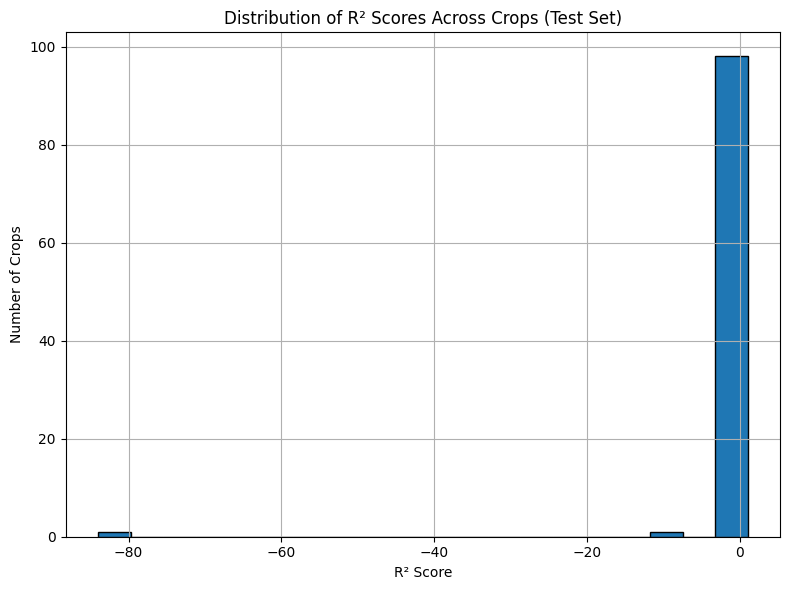

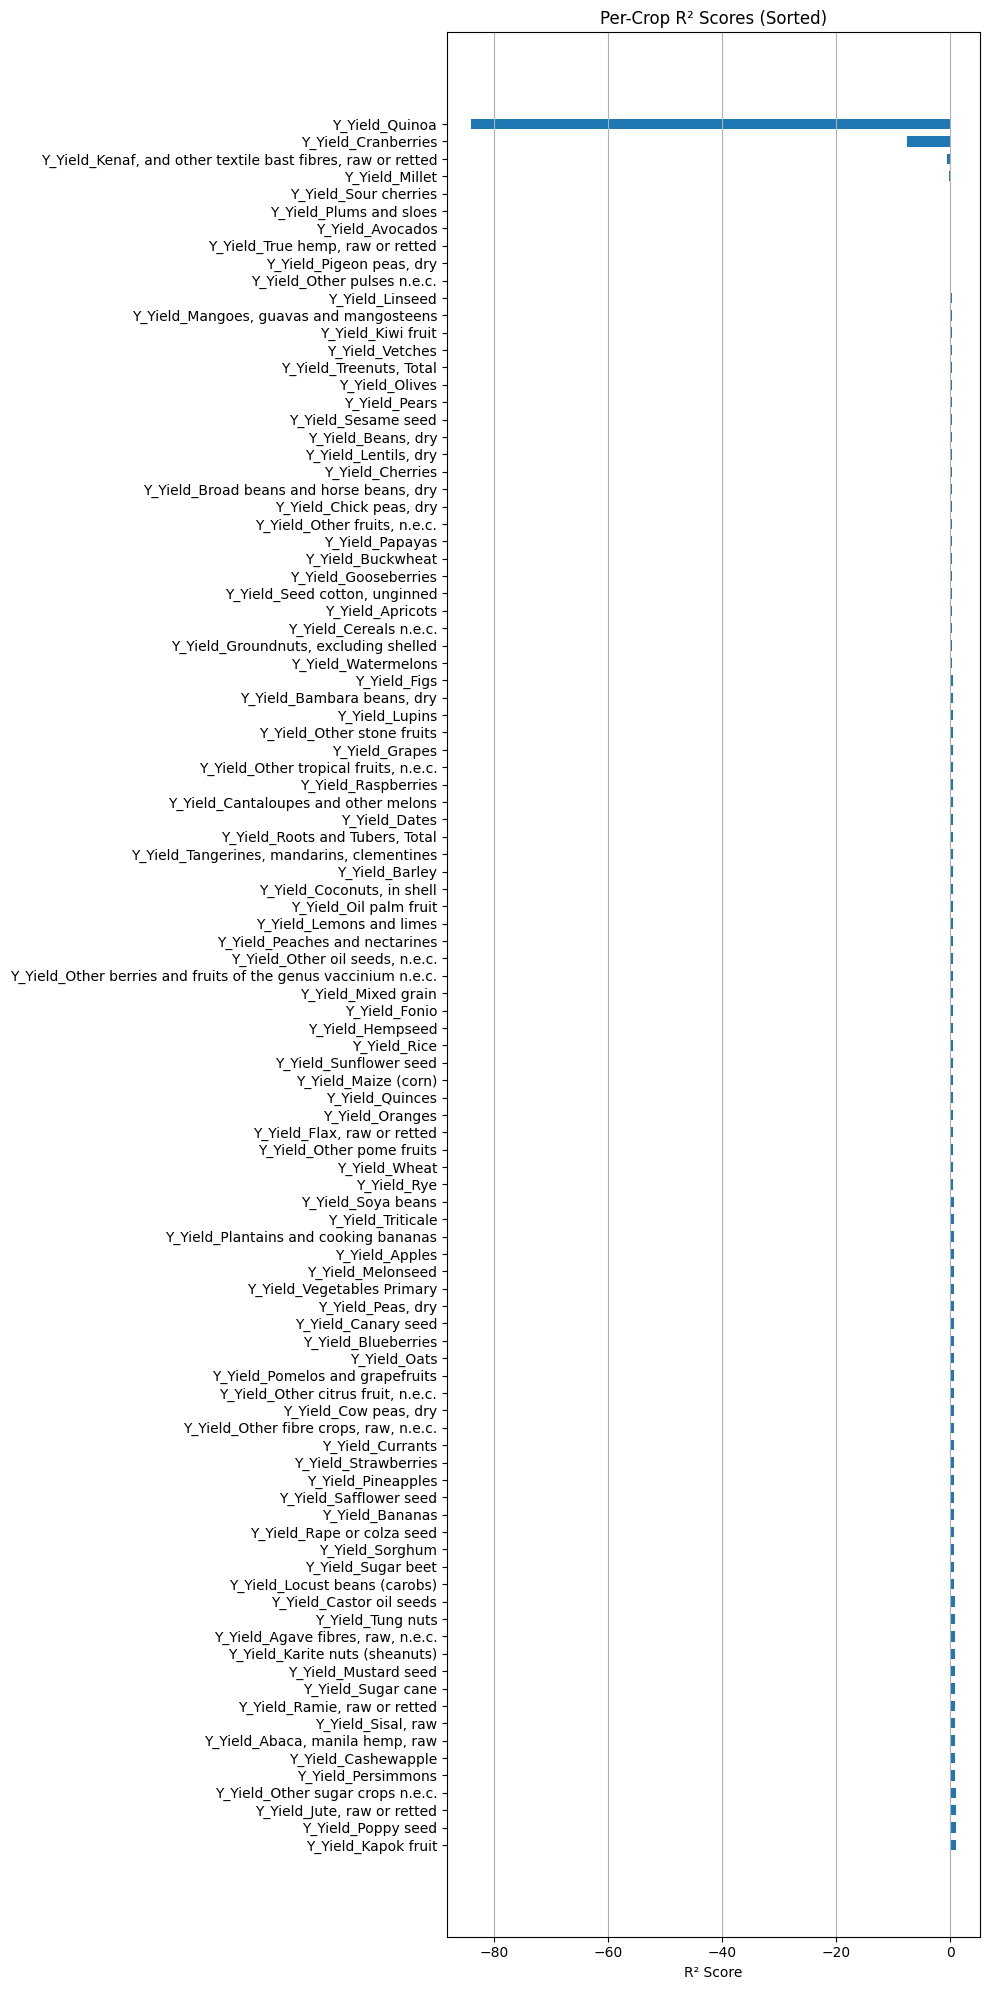

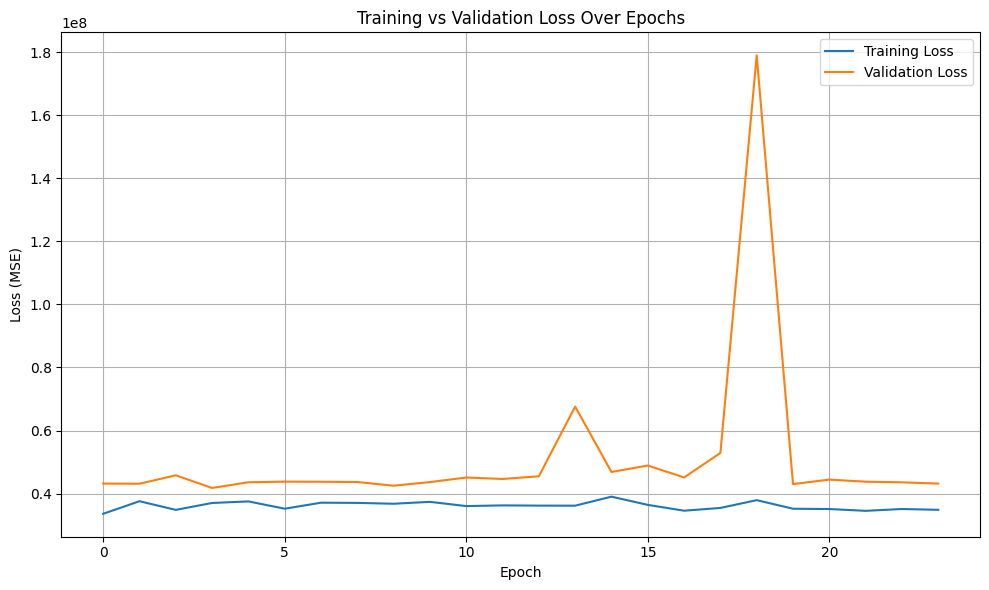

✅ R² scores exported to CSV.
✅ Test SMAPE: 38.24%


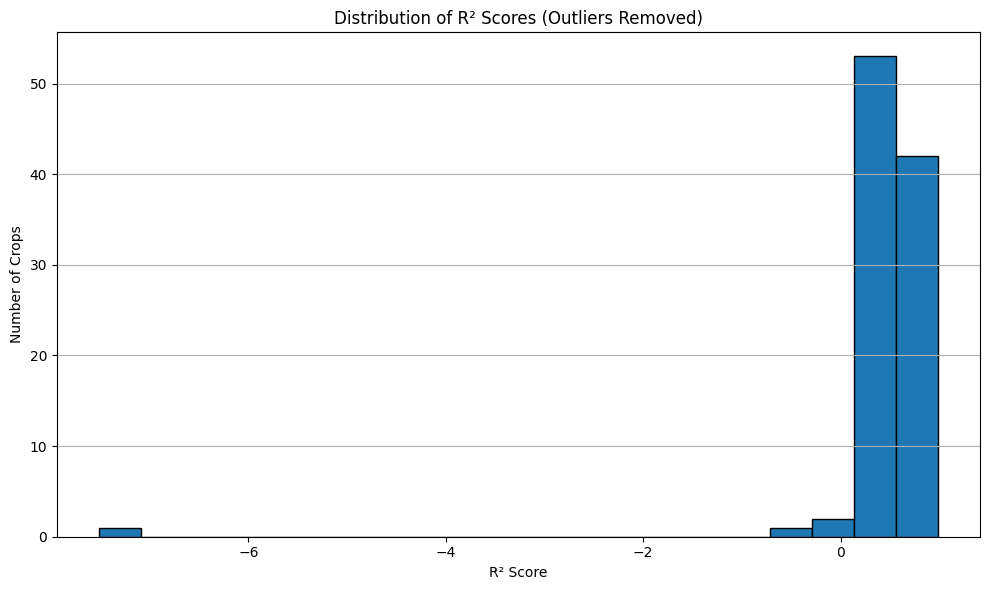

✅ Cleaned Mean R² (no Quinoa or cranberries): 0.447


In [ ]:
r2_cleaned = [r2 for r2 in r2_scores if not np.isnan(r2)]

plt.figure(figsize=(8, 6))
plt.hist(r2_cleaned, bins=20, edgecolor='black')
plt.xlabel('R² Score')
plt.ylabel('Number of Crops')
plt.title('Distribution of R² Scores Across Crops (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.savefig("r2_histogram.png", dpi=300)
plt.show()

crop_r2 = [(label, score) for label, score in zip(y_cols, r2_scores) if not np.isnan(score)]
crop_r2.sort(key=lambda x: x[1], reverse=True)

labels = [label for label, _ in crop_r2]
scores = [score for _, score in crop_r2]

plt.figure(figsize=(10, 20))
y_pos = np.arange(len(labels))

plt.barh(y_pos, scores, height=0.6)
plt.yticks(y_pos, labels)
plt.xlabel('R² Score')
plt.title('Per-Crop R² Scores (Sorted)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig("per_crop_r2_scores.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curve.png", dpi=300)
plt.show()

r2_df = pd.DataFrame({
    "Crop": y_cols,
    "R2_Score": r2_scores
})

# Optional: sort by R² score
r2_df = r2_df.sort_values(by="R2_Score", ascending=False)

# Save to CSV
r2_df.to_csv(r"C:\Users\david\OneDrive\Documents\ml data assine\Cleaned\r2_scores.csv", index=False)

print("✅ R² scores exported to CSV.")

def smape(y_true, y_pred, mask): # a function to compute Symmetric Mean Absolute Percentage Error (SMAPE)
    numerator = np.abs(y_true - y_pred) # calculate the absolute difference
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2 # calculate the average of the absolute values
    

    denominator = np.where(denominator == 0, 1e-8, denominator)

    smape_per_elem = (numerator / denominator) * 100
    smape_masked = smape_per_elem[mask == 1]

    return np.mean(smape_masked)

# Apply for entire test set
mask_np = (mask_np == 1) & (~np.isnan(preds_np)) & (~np.isnan(labels_np))  # Ensure valid values
overall_smape = smape(labels_np, preds_np, mask_np)

print(f"✅ Test SMAPE: {overall_smape:.2f}%")

r2_df = pd.DataFrame({
    "Crop": y_cols,
    "R2": r2_scores
})

# Step 2: Drop outliers
outliers = ["Y_Yield_Quinoa", "Y_Yield_Kenaf, and other textile bast fibres, raw or retted,Y_Yield_Cranberries", "Y_Yield_fibres of other plants, nes"]
r2_df_cleaned = r2_df[~r2_df["Crop"].isin(outliers)]

# Step 3: Drop NaNs (if any) and extract R² values
clean_r2_values = r2_df_cleaned["R2"].dropna()

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(clean_r2_values, bins=20, edgecolor='black')
plt.title("Distribution of R² Scores (Outliers Removed)")
plt.xlabel("R² Score")
plt.ylabel("Number of Crops")
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("r2_histogram_cleaned.png", dpi=300)
plt.show()

# Optional: Recalculate and print mean R²
mean_r2_cleaned = clean_r2_values.mean()
print(f"✅ Mean R² (no Quinoa or cranberries): {mean_r2_cleaned:.3f}")